In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import cm
import datetime
from sklearn.mixture import GaussianMixture

In [13]:
#pip install fastparquet #Only run this once

In [14]:
#pip install pyarrow #Only run this once

## Import data

In [2]:
df_z = pd.read_parquet('covid_cases_z_trans.parquet')

In [3]:
df_case_per_popu = pd.read_parquet('cases_per_popu_mod.parquet')

## Look at the files

In [4]:
df_z

,Algeria,Argentina,Australia,Austria,Bangladesh,Belarus,Belgium,Bolivia,Bulgaria,Canada,...,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Vietnam,Zambia,Zimbabwe
2020-03-01,-1.016766,-0.704723,-1.314497,-2.128248,-0.974537,-1.383280,-2.021154,-0.852664,-0.982762,-1.692528,...,-1.677526,-0.777542,-0.977963,-1.334201,-1.828760,-1.206989,-1.733456,-1.337746,-0.739615,-0.683331
2020-03-02,-1.016766,-0.704723,-1.314127,-2.127737,-0.974537,-1.383280,-2.020472,-0.852664,-0.982762,-1.692440,...,-1.677526,-0.777542,-0.977963,-1.334201,-1.828718,-1.206979,-1.733456,-1.337746,-0.739615,-0.683331
2020-03-03,-1.016766,-0.704723,-1.313633,-2.127226,-0.974537,-1.383280,-2.019753,-0.852664,-0.982762,-1.692375,...,-1.677526,-0.777542,-0.977963,-1.334201,-1.828530,-1.206972,-1.733456,-1.337746,-0.739615,-0.683331
2020-03-04,-1.016640,-0.704717,-1.312644,-2.126459,-0.974537,-1.383176,-2.018465,-0.852664,-0.982762,-1.692310,...,-1.677526,-0.777542,-0.977941,-1.333975,-1.828189,-1.206962,-1.733456,-1.337746,-0.739615,-0.683331
2020-03-05,-1.016198,-0.704717,-1.311286,-2.125820,-0.974537,-1.383107,-2.016458,-0.852664,-0.982762,-1.692244,...,-1.677526,-0.777542,-0.977941,-1.333975,-1.827721,-1.206946,-1.733456,-1.337746,-0.739615,-0.683331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13,2.016393,2.740315,1.969158,2.081425,1.823057,1.178137,1.573116,2.018466,2.019702,1.276480,...,1.461619,3.285974,2.483453,1.635047,1.283146,1.878256,1.881160,2.001312,2.329673,2.335836
2020-09-14,2.032000,2.809629,1.974593,2.130498,1.835345,1.184992,1.584327,2.036903,2.024233,1.287779,...,1.478169,3.368921,2.539890,1.659154,1.311527,1.894367,1.938019,2.010907,2.346312,2.343075
2020-09-15,2.047291,2.867868,1.979658,2.200657,1.850430,1.191467,1.645874,2.055774,2.048231,1.317246,...,1.496767,3.368921,2.596008,1.688422,1.333865,1.910940,1.946142,2.010907,2.387567,2.345085
2020-09-16,2.062329,2.931587,1.985341,2.310560,1.864782,1.198116,1.679885,2.070975,2.074243,1.334543,...,1.515647,3.648866,2.729647,1.713810,1.360311,1.935425,1.976602,2.010907,2.410132,2.363181


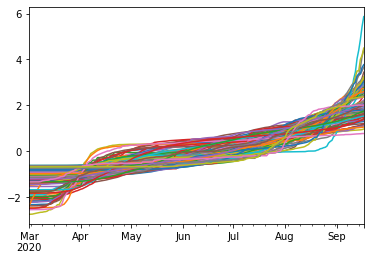

In [5]:
df_z.plot(legend='')

In [6]:
countries_z = []
for col in df_z.columns:
    countries_z.append(col)

## K-means on z-transformed

Use scikit-learn's function for Kmeans with k=4 given from the Elbow method

In [7]:
kmeans_z = KMeans(n_clusters=4).fit(df_z.T)

In [8]:
labels_kmeans_z = kmeans_z.labels_[:]
labels_kmeans_z

array([2, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2, 2, 3, 1, 3, 1, 2, 0, 2, 1, 2,
       1, 1, 3, 0, 3, 3, 1, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2,
       1, 3, 2, 2, 2, 3, 2, 1, 0, 1, 0, 0, 2, 3, 0, 2, 0, 1, 2, 0, 2, 0,
       0, 0, 3, 3, 2, 3, 3, 0, 0, 1, 1, 0, 3, 1, 3, 2, 0, 1, 0, 0, 2, 2,
       2], dtype=int32)

In [9]:
print("K-means:")
print("Countries in cluster 0:", np.count_nonzero(labels_kmeans_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_kmeans_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_kmeans_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_kmeans_z == 3))

K-means:
Countries in cluster 0: 22
Countries in cluster 1: 22
Countries in cluster 2: 31
Countries in cluster 3: 14


In [10]:
#Make a new data frame for each cluster
df_kmeans_z_0 = df_z.T.loc[labels_kmeans_z== 0].transpose()
df_kmeans_z_1 = df_z.T.loc[labels_kmeans_z == 1].transpose()
df_kmeans_z_2 = df_z.T.loc[labels_kmeans_z == 2].transpose()
df_kmeans_z_3 = df_z.T.loc[labels_kmeans_z == 3].transpose()

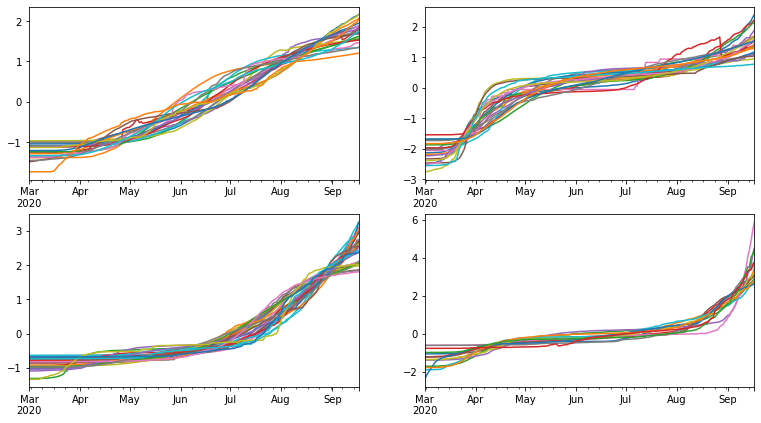

In [11]:
#Make a figure with the four clusters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(13, 7)
df_kmeans_z_0.plot(legend='', ax=axes[0,0])
df_kmeans_z_1.plot(legend='', ax=axes[0,1])
df_kmeans_z_2.plot(legend='', ax=axes[1,0])
df_kmeans_z_3.plot(legend='', ax=axes[1,1])

In [12]:
#df_kmeans_z_0.to_parquet('df_kmeans_z_0.parquet')
#df_kmeans_z_1.to_parquet('df_kmeans_z_1.parquet')
#df_kmeans_z_2.to_parquet('df_kmeans_z_2.parquet')
#df_kmeans_z_3.to_parquet('df_kmeans_z_3.parquet')

The plot visualize the four clusters

## HAC on z-transform

In [13]:
hac_z = AgglomerativeClustering(n_clusters=4)
hac_z= hac_z.fit(df_z.T)

In [14]:
#The labels for the HAC-clustering 
labels_hac_z = hac_z.labels_
labels_hac_z

array([1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 1, 3, 0, 3, 0, 1, 2, 1, 0, 1,
       0, 0, 0, 2, 3, 3, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       0, 3, 1, 1, 1, 3, 1, 0, 2, 0, 2, 2, 1, 3, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 3, 0, 1, 3, 0, 2, 2, 0, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 1, 1,
       1])

In [15]:
print("HAC:")
print("Countries in cluster 0:", np.count_nonzero(labels_hac_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_hac_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_hac_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_hac_z == 3))

HAC:
Countries in cluster 0: 26
Countries in cluster 1: 31
Countries in cluster 2: 21
Countries in cluster 3: 11


In [16]:
#Make a new data frame for each cluster
df_hac_z_0 = df_z.T.loc[labels_hac_z == 0].transpose()
df_hac_z_1 = df_z.T.loc[labels_hac_z == 1].transpose()
df_hac_z_2 = df_z.T.loc[labels_hac_z == 2].transpose()
df_hac_z_3 = df_z.T.loc[labels_hac_z == 3].transpose()

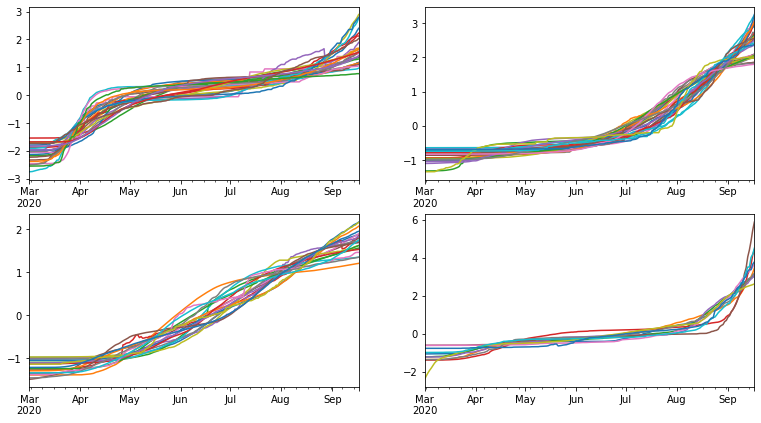

In [17]:
#Make a figure with the four clusters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(13, 7)
df_hac_z_0.plot(legend='', ax=axes[0,0])
df_hac_z_1.plot(legend='', ax=axes[0,1])
df_hac_z_2.plot(legend='', ax=axes[1,0])
df_hac_z_3.plot(legend='', ax=axes[1,1])

In [18]:
df_hac_z_0.to_parquet('df_hac_z_0.parquet')
df_hac_z_1.to_parquet('df_hac_z_1.parquet')
df_hac_z_2.to_parquet('df_hac_z_2.parquet')
df_hac_z_3.to_parquet('df_hac_z_3.parquet')

## GMM on z-transform

In [30]:
gmm_z = GaussianMixture(4) #GMM with 4 clusters
gmm_z.fit(df_z.T)
labels_gmm_z = gmm_z.predict(df_z.T)

In [31]:
labels_gmm_z

array([2, 1, 1, 3, 2, 0, 3, 2, 2, 0, 2, 1, 1, 1, 3, 1, 3, 2, 2, 2, 3, 1,
       3, 0, 3, 2, 1, 3, 3, 1, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2, 3, 3, 3, 2,
       0, 1, 2, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2,
       2, 2, 1, 3, 2, 1, 3, 0, 0, 3, 3, 2, 1, 0, 1, 1, 0, 0, 2, 3, 1, 1,
       1], dtype=int64)

In [32]:
print("GMM:")
print("Countries in cluster 0:", np.count_nonzero(labels_gmm_z == 0))
print("Countries in cluster 1:", np.count_nonzero(labels_gmm_z == 1))
print("Countries in cluster 2:", np.count_nonzero(labels_gmm_z == 2))
print("Countries in cluster 3:", np.count_nonzero(labels_gmm_z == 3))

GMM:
Countries in cluster 0: 11
Countries in cluster 1: 30
Countries in cluster 2: 28
Countries in cluster 3: 20


In [33]:
#Make a new data frame for each cluster
df_gmm_z_0 = df_z.T.loc[labels_gmm_z == 0].transpose()
df_gmm_z_1 = df_z.T.loc[labels_gmm_z == 1].transpose()
df_gmm_z_2 = df_z.T.loc[labels_gmm_z == 2].transpose()
df_gmm_z_3 = df_z.T.loc[labels_gmm_z == 3].transpose()

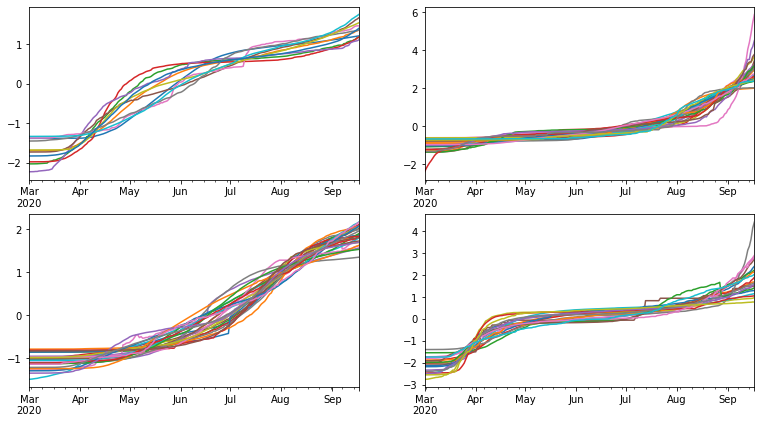

In [34]:
#Make a figure with the four clusters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(13, 7)
df_gmm_z_0.plot(legend='', ax=axes[0,0])
df_gmm_z_1.plot(legend='', ax=axes[0,1])
df_gmm_z_2.plot(legend='', ax=axes[1,0])
df_gmm_z_3.plot(legend='', ax=axes[1,1])